In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

def scrape_reviews(base_url, num_pages=10):
    # Initialize the Selenium WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    all_reviews = []

    for page_number in range(1, num_pages + 1):
        print(f"Scraping page {page_number}...")

        # Construct URL for the current page
        url = f"{base_url}/page/{page_number}/"
        driver.get(url)
        
        # Wait for the page to load completely
        time.sleep(5)

        # Get the page source
        html_content = driver.page_source

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract reviews
        for article in soup.find_all('article', itemprop='review'):
            try:
                date_published = article.find('meta', itemprop='datePublished')['content']
                rating_value = article.find('span', itemprop='ratingValue').text
                best_rating = article.find('span', itemprop='bestRating').text
                author_name = article.find('span', itemprop='name').text
                review_body = article.find('div', itemprop='reviewBody').text.strip()

                # Extract ratings for different categories
                ratings = {}
                for row in article.select('table.review-ratings tr'):
                    key = row.find('td', class_='review-rating-header').text.strip()
                    value = row.find('td', class_='review-value')
                    if value:
                        ratings[key] = value.text.strip()
                    else:
                        # Extract stars for categories with stars instead of text
                        stars = len(row.find_all('span', class_='star fill'))
                        ratings[key] = stars

                # Extract recommendation
                recommended = article.select_one('td.review-value.rating-no')
                recommended = 'No' if recommended else 'Yes'

                # Append data to the list
                all_reviews.append({
                    'Date Published': date_published,
                    'Rating': int(rating_value),
                    'Best Rating': int(best_rating),
                    'Author': author_name,
                    'Review': review_body,
                    **ratings,
                    'Recommended': recommended
                })
            except Exception as e:
                print(f"Error extracting review: {e}")
                continue

    # Close the WebDriver
    driver.quit()

    return all_reviews

# Base URL of the British Airways reviews page
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'

# Scrape reviews from all pages
reviews = scrape_reviews(base_url, num_pages=10)

# Convert the list to a DataFrame
df = pd.DataFrame(reviews)

# Save the DataFrame to a CSV file (optional)
df.to_csv('british_airways_reviews.csv', index=False)

# Display the DataFrame
print(df.head())

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
  Date Published  Rating  Best Rating             Author  \
0     2025-05-08      10           10       Ramona Gehri   
1     2025-04-29       3           10            R Heale   
2     2025-04-22       6           10       Shane Bailey   
3     2025-04-22       6           10      Nick Biskinis   
4     2025-04-18       5           10  Graham Henrickson   

                                              Review Type Of Traveller  \
0  ✅ Trip Verified |   We are extremely grateful ...    Couple Leisure   
1  ✅ Trip Verified |   I had an appalling experie...      Solo Leisure   
2  Not Verified |  Good points, the cabin crew, t...          Business   
3  Not Verified |  It was a decent flight, reason...    Family Leisure   
4  ✅ Trip Verified |   I really like flying Briti...      Solo Leisure   

   

In [2]:
df.head()

,Date Published,Rating,Best Rating,Author,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
0,2025-05-08,10,10,Ramona Gehri,✅ Trip Verified | We are extremely grateful ...,Couple Leisure,Economy Class,Cape Town to London,May 2025,4.0,5.0,3.0,5.0,5.0,5.0,5,Yes,NaN
1,2025-04-29,3,10,R Heale,✅ Trip Verified | I had an appalling experie...,Solo Leisure,Economy Class,Johannesburg to London Heathrow,April 2025,1.0,1.0,NaN,NaN,1.0,NaN,1,No,A380
2,2025-04-22,6,10,Shane Bailey,"Not Verified | Good points, the cabin crew, t...",Business,Business Class,Heathrow to Kraków,April 2025,2.0,4.0,4.0,NaN,2.0,1.0,2,Yes,A319
3,2025-04-22,6,10,Nick Biskinis,"Not Verified | It was a decent flight, reason...",Family Leisure,Economy Class,London Heathrow to Athens,April 2025,3.0,3.0,1.0,1.0,3.0,2.0,2,Yes,A321 Neo
4,2025-04-18,5,10,Graham Henrickson,✅ Trip Verified | I really like flying Briti...,Solo Leisure,Business Class,Singapore to Sydney,March 2025,5.0,2.0,2.0,5.0,4.0,NaN,3,Yes,Boeing 777


In [3]:
df.fillna(0, inplace= True)

In [4]:
df.head()

,Date Published,Rating,Best Rating,Author,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
0,2025-05-08,10,10,Ramona Gehri,✅ Trip Verified | We are extremely grateful ...,Couple Leisure,Economy Class,Cape Town to London,May 2025,4.0,5.0,3.0,5.0,5.0,5.0,5,Yes,0
1,2025-04-29,3,10,R Heale,✅ Trip Verified | I had an appalling experie...,Solo Leisure,Economy Class,Johannesburg to London Heathrow,April 2025,1.0,1.0,0.0,0.0,1.0,0.0,1,No,A380
2,2025-04-22,6,10,Shane Bailey,"Not Verified | Good points, the cabin crew, t...",Business,Business Class,Heathrow to Kraków,April 2025,2.0,4.0,4.0,0.0,2.0,1.0,2,Yes,A319
3,2025-04-22,6,10,Nick Biskinis,"Not Verified | It was a decent flight, reason...",Family Leisure,Economy Class,London Heathrow to Athens,April 2025,3.0,3.0,1.0,1.0,3.0,2.0,2,Yes,A321 Neo
4,2025-04-18,5,10,Graham Henrickson,✅ Trip Verified | I really like flying Briti...,Solo Leisure,Business Class,Singapore to Sydney,March 2025,5.0,2.0,2.0,5.0,4.0,0.0,3,Yes,Boeing 777


Top 10 words for topic #0:
['british', 'crew', 'passengers', 'airways', 'told', 'delayed', 'airline', 'hours', 'ba', 'flight']
Top 10 words for topic #1:
['airways', 'days', 'hours', 'later', 'bag', 'time', 'service', 'ba', 'flight', 'told']
Top 10 words for topic #2:
['airline', 'line', 'hours', 'class', 'rome', 'british', 'ba', 'service', 'flight', 'seat']
Top 10 words for topic #3:
['club', 'lounge', 'time', 'excellent', 'cabin', 'crew', 'ba', 'food', 'flight', 'good']
Top 10 words for topic #4:
['london', 'airport', 'customer', 'seats', 'plane', 'airways', 'ba', 'service', 'british', 'flight']


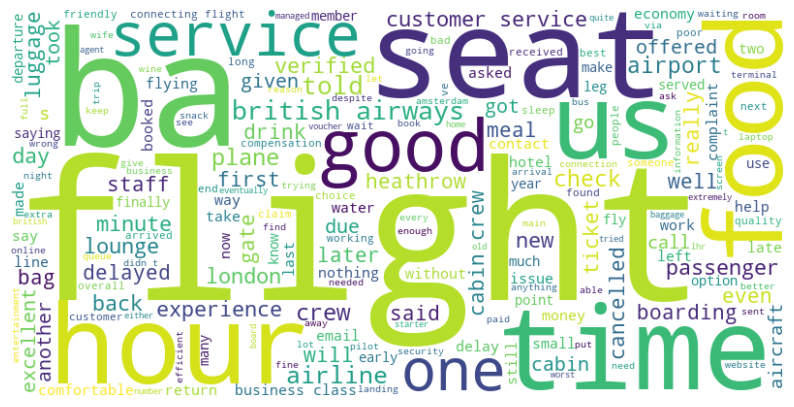

C:\Users\MORRIS CAPT\AppData\Local\Temp\ipykernel_27036\2941213929.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Category', palette='viridis')


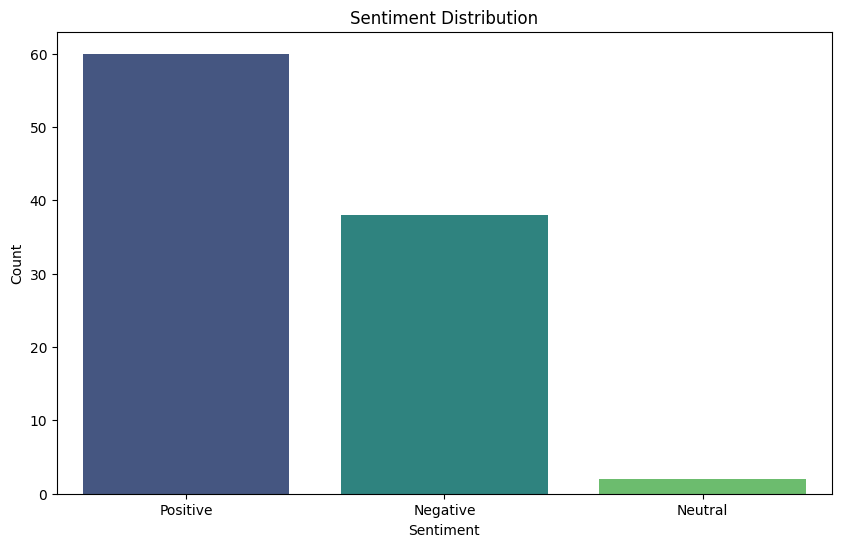

C:\Users\MORRIS CAPT\AppData\Local\Temp\ipykernel_27036\2941213929.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Category', y='Rating', palette='viridis')


<Figure size 640x480 with 0 Axes>

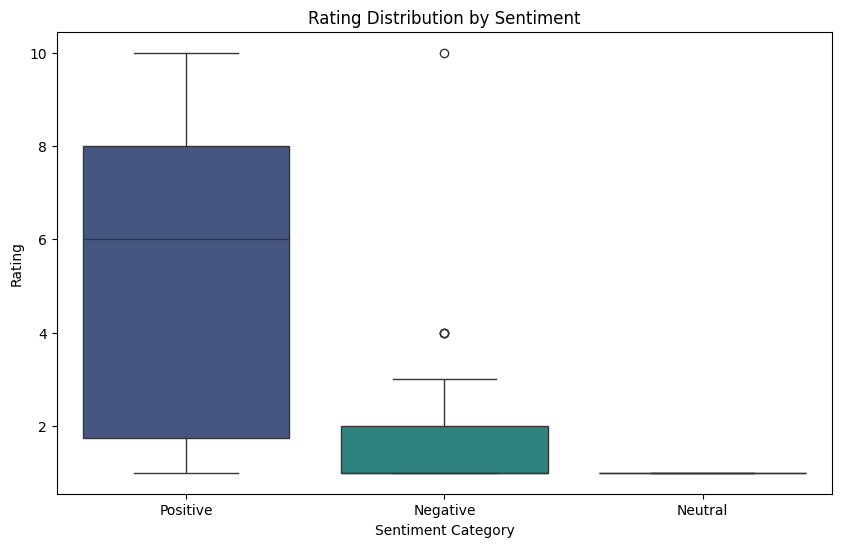

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('british_airways_reviews.csv')

# Step 1: Data Cleaning
def clean_text(text):
    # Remove any unwanted characters
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'✅ Trip Verified |', '', text)  # Remove specific phrases
    text = text.lower()  # Convert to lowercase
    return text.strip()

df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Step 2: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Categorize sentiment into Positive, Neutral, Negative
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Step 3: Topic Modeling
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
X = vectorizer.fit_transform(df['Cleaned_Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Step 4: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Review']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Distribution Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Save sentiment distribution plot
plt.savefig('sentiment_distribution.png')

# Step 5: Analyze by Rating
# Distribution of ratings based on sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment_Category', y='Rating', palette='viridis')
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Rating')
plt.show()

# Save sentiment vs. rating plot
plt.savefig('rating_sentiment_distribution.png')